### Sample Average Method on Nonstationarity K-Armed Bandit Problem

#### Problem Statement

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha$ = 0.1. Use $\epsilon$ = 0.1 and longer runs, say of 10,000 steps.

In [9]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from bandit import KArmedBandit

In [10]:
bandit_constant_step = KArmedBandit(k=10, step_size_fn_type="exp-recency") 
bandit_nonconstant_step = KArmedBandit(k=10, step_size_fn_type="sample-avg")
NUM_RUNS = 2000
TIME_STEPS = 10000

all_runs_constant_step = np.empty((NUM_RUNS, bandit_constant_step.TIME_STEPS))
all_runs_nonconstant_step = np.empty((NUM_RUNS, bandit_nonconstant_step.TIME_STEPS))
all_accuracies_constant_step = np.empty((NUM_RUNS, bandit_constant_step.TIME_STEPS))
all_accuracies_nonconstant_step = np.empty((NUM_RUNS, bandit_nonconstant_step.TIME_STEPS))

for i in range(NUM_RUNS):
    bandit_constant_step.perform_one_run()
    bandit_nonconstant_step.perform_one_run()
    all_runs_constant_step[i] = bandit_constant_step.run_data
    all_runs_nonconstant_step[i] = bandit_nonconstant_step.run_data
    all_accuracies_constant_step[i] = bandit_constant_step.accuracy
    all_accuracies_nonconstant_step[i] = bandit_nonconstant_step.accuracy
    


/Users/michaelnath/programming/rl/bandit.py:62: RuntimeWarning: invalid value encountered in true_divide
  a = np.argmax(self.q + self.C * np.sqrt(np.log(t) / self.n))
/Users/michaelnath/programming/rl/bandit.py:62: RuntimeWarning: divide by zero encountered in true_divide
  a = np.argmax(self.q + self.C * np.sqrt(np.log(t) / self.n))


(0.0, 2.0)

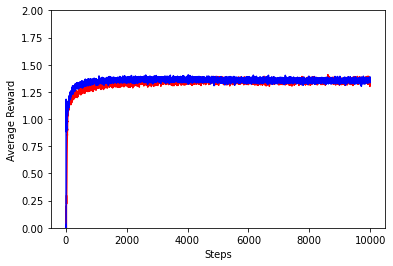

In [11]:
time_steps = np.arange(1, TIME_STEPS + 1)
averaged_rewards_constant_step = np.average(all_runs_constant_step, axis=0)
averaged_rewards_nonconstant_step = np.average(all_runs_nonconstant_step, axis=0)
plt.plot(time_steps, averaged_rewards_constant_step, color="red")
plt.plot(time_steps, averaged_rewards_nonconstant_step, color="blue")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.ylim(0, 2)

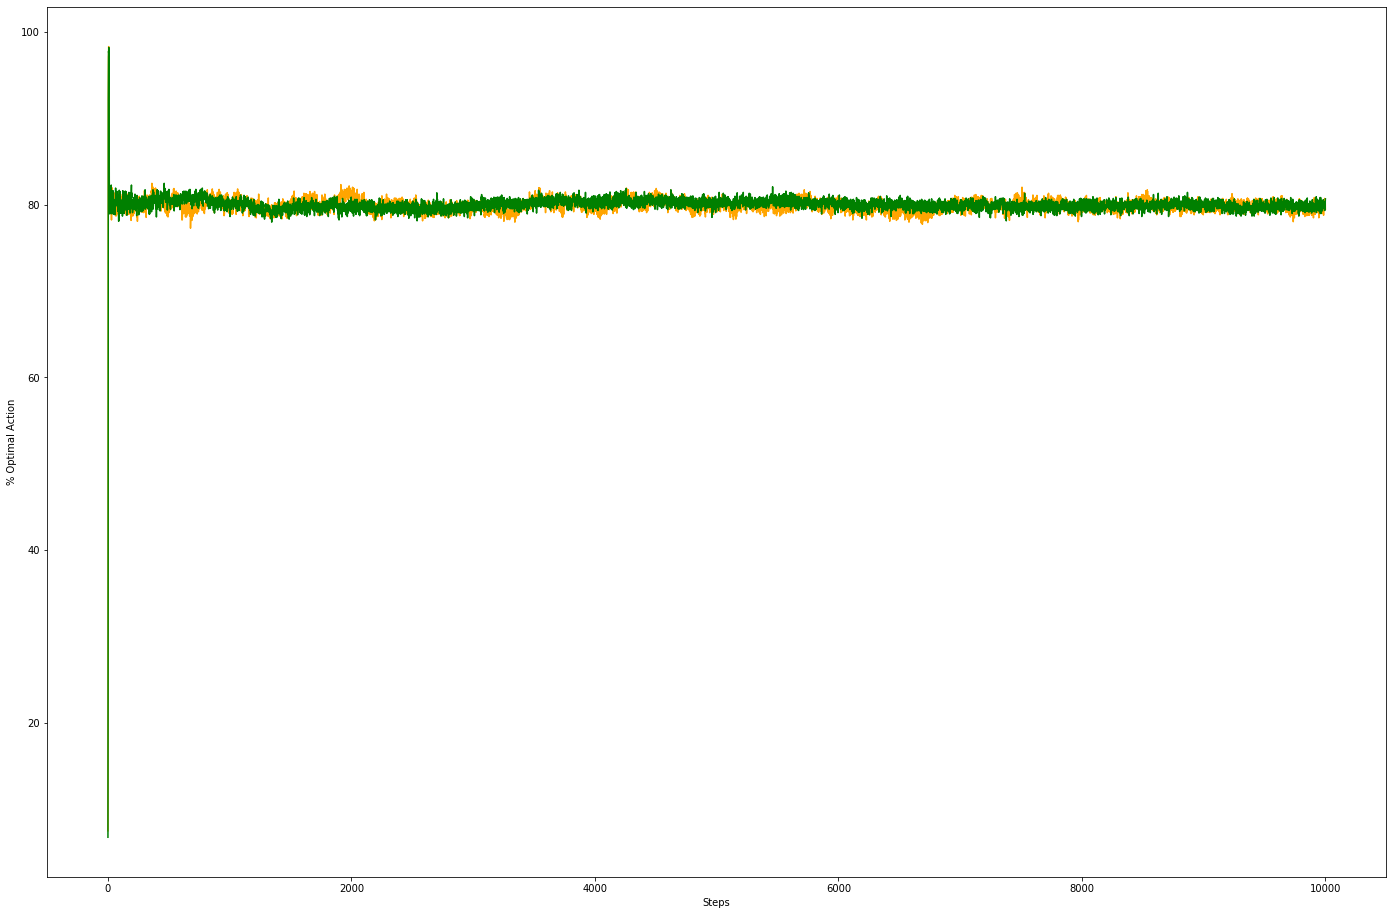

In [12]:
averaged_accuracies_constant_step = np.average(all_accuracies_constant_step, axis=0)
averaged_accuracies_nonconstant_step = np.average(all_accuracies_nonconstant_step, axis=0)
plt.figure(figsize=(24, 16))
plt.plot(time_steps, averaged_accuracies_constant_step * 100, color="orange")
plt.plot(time_steps, averaged_accuracies_nonconstant_step * 100, color="green")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.show()